In [194]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamientos

In [195]:
df = pd.read_csv('/home/mr1142/Documents/Data/mask_validation_data/train/training_data.csv')

In [196]:
df['mask'] = [nombre[-1] for nombre in df.name]
df['number'] = [nombre[-2] for nombre in df.name]

In [197]:
df.sort_values(['number', 'mask'])
df.sort_values('AUC_val')

,name,loss,BinaryAccuracy,Precision,AUC,loss_val,BinaryAccuracy_val,Precision_val,AUC_val,mask,number
3,lung_thorax_02,0.638814,0.967031,0.969087,0.993418,1.483738,0.668750,0.721030,0.715298,2,0
12,lung_thorax_42,0.639458,0.964531,0.965668,0.992718,1.088002,0.657500,0.701635,0.716939,2,4
7,lung_thorax_72,0.643857,0.946563,0.946987,0.986265,1.310732,0.665000,0.724051,0.725525,2,7
8,lung_thorax_32,0.652326,0.963437,0.965869,0.993936,1.747737,0.661875,0.752883,0.726281,2,3
14,lung_thorax_92,0.643801,0.950000,0.954386,0.987753,1.320152,0.681875,0.735192,0.728630,2,9
6,lung_thorax_31,0.647042,0.963281,0.964504,0.992360,1.388521,0.684375,0.738661,0.729081,1,3
19,lung_thorax_12,0.660160,0.970625,0.971478,0.996005,1.745218,0.687500,0.738372,0.735922,2,1
2,lung_thorax_21,0.650341,0.953750,0.957093,0.989268,1.581778,0.683750,0.740027,0.736685,1,2
0,lung_thorax_01,0.645626,0.971406,0.974554,0.995717,1.517981,0.685000,0.692475,0.738137,1,0
5,lung_thorax_71,0.638847,0.957187,0.960572,0.992068,1.358955,0.670000,0.730070,0.738600,1,7


[(0.7, 0.8)]

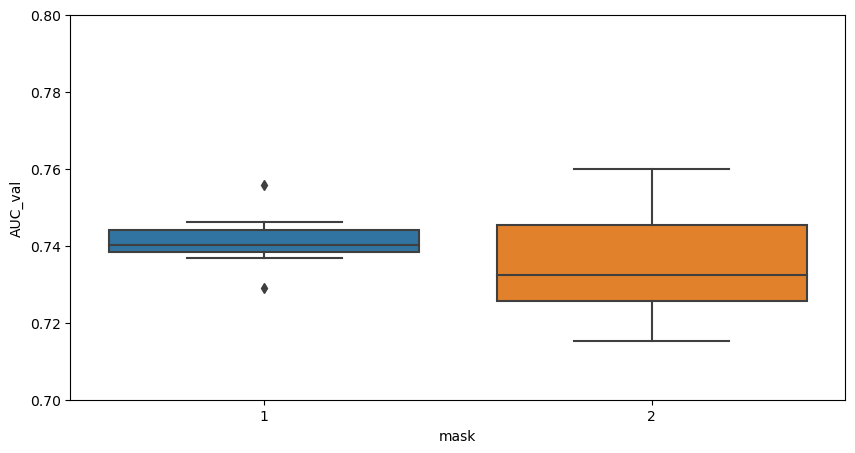

In [198]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="mask", y='AUC_val',
                data=df)
p.set(ylim=(0.7, 0.8))

In [199]:
fig = p.get_figure()
fig.savefig("/home/mr1142/Documents/Data/out.png")

In [200]:
import scipy.stats as st

In [201]:
st.shapiro(df.AUC_val)

ShapiroResult(statistic=0.9720363020896912, pvalue=0.7971733808517456)

In [202]:
st.ttest_ind(df.AUC_val[df['mask'] == '1'], df.AUC_val[df['mask'] == '2'])

Ttest_indResult(statistic=1.2301901683303127, pvalue=0.23446189041608628)

# Validacion

Entrenado en el dataset masks

Validado esternamente en el dataset pediatrico

In [203]:
d = pd.read_csv('/home/mr1142/Documents/Data/models/mascaras_img_class/image_class_evaluation_pediatric.csv')

In [204]:
d.columns

Index(['nombre', 'model', 'pixels', 'mask', 'augment', 'frozen_layer',
       'loss_type', 'lr', 'batch', 'int_delong_auc', 'int_crossv_auc', 'loss',
       'binary_accuracy', 'precision', 'auc', 'ext_delong_auc',
       'ext_crossv_auc', 'auc_external', 'younden_external', 'pr_max_external',
       'pr_cut_external', 'f1_score_younden_external',
       'precision_score_younden_external', 'recall_score_younden_external',
       'accuracy_score_younden_external', 'f1_score_pr_max_external',
       'precision_score_pr_max_external', 'recall_score_pr_max_external',
       'accuracy_score_pr_max_external', 'f1_score_pr_cut_external',
       'precision_score_pr_cut_external', 'recall_score_pr_cut_external',
       'accuracy_score_pr_cut_external', 'f1_score_0.5_external',
       'precision_score_0.5_external', 'recall_score_0.5_external',
       'accuracy_score_0.5_external', 'f1_score_max_external',
       'precision_score_max_external', 'recall_score_max_external',
       'accuracy_score_

In [205]:
d.transpose()

,0,1,2
nombre,lung_thorax_62,lung_thorax_41,lung_thorax_42
model,Xception,Xception,Xception
pixels,512,512,512
mask,2,1,2
augment,True,True,True
frozen_layer,0.8,0.8,0.8
loss_type,categorical_crossentropy,categorical_crossentropy,categorical_crossentropy
lr,0.0001,0.0001,0.0001
batch,8,8,8
int_delong_auc,"(-0.5996504644797988, 0.00017945139575186898)","(-0.5988888989723904, 4.225125520262077e-07)","(0.08557111439833254, 0.0005401747989747398)"
